In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.animation import FuncAnimation
from scipy import stats

In [2]:
def PDash(X,h):
    n = X.shape[0]
    Px = np.zeros((n,X.shape[1]))
    #Py = np.zeros(n)
    #h = 1.5
    
    for i in range(n):
        M = (1/n)*(X.T[0][i]-X.T[0])
        Px.T[0][i] = (h+2)/(h**2)*np.sum(M)  
        
    for i in range(n):
        M = (1/n)*(X.T[1][i]-X.T[1])
        Px.T[1][i] = (h+2)/(h**2)*np.sum(M)
    return Px

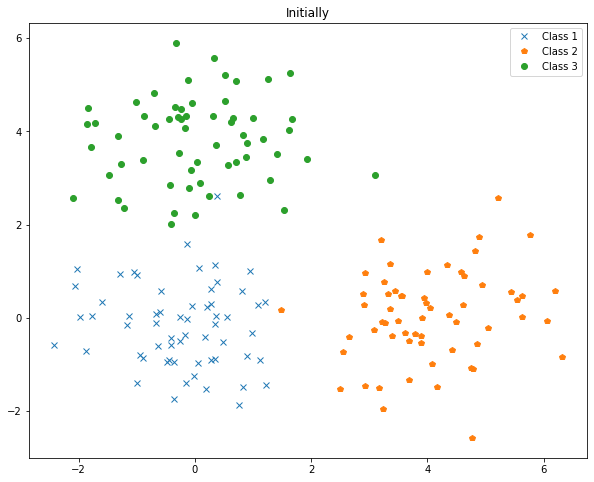

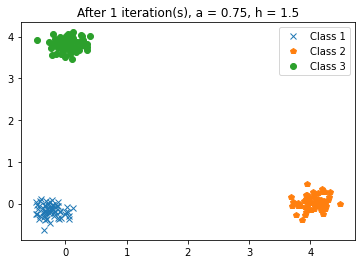

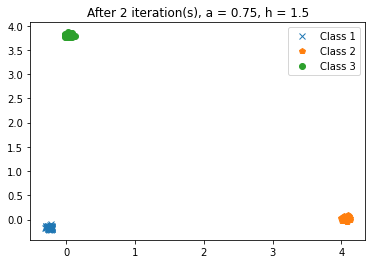

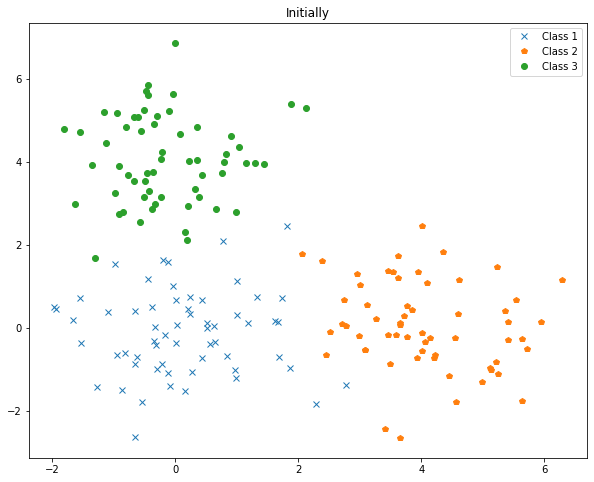

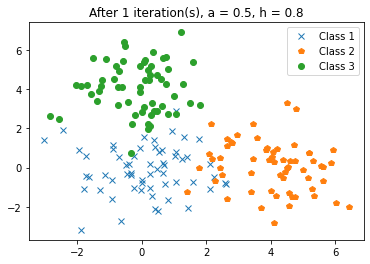

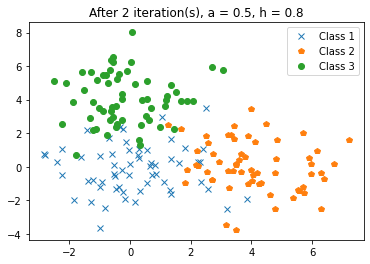

In [3]:
aVal = np.asarray([0.75,0.5])
hVal = np.asarray([1.5,0.8])

for j in range(2):    
    C1_mean = [0, 0]  # mean of x and y  
    C2_mean = [4,0]
    C3_mean = [0,4]
    Cov = [[1,0], [0,1]]  # covariance matrix of x and y
    C1 = multivariate_normal.rvs(C1_mean, Cov, size=60)
    C2 = multivariate_normal.rvs(C2_mean, Cov, size=60)
    C3 = multivariate_normal.rvs(C3_mean, Cov, size=60)

    plt.figure(figsize=(10,8))
    plt.title("Initially" )
    plt.plot(C1.T[0],C1.T[1],"x",label="Class 1")
    plt.plot(C2.T[0],C2.T[1],"p",label="Class 2")
    plt.plot(C3.T[0],C3.T[1],"o",label="Class 3")
    plt.legend()
    plt.show()
    for i in range(2):    
        a = aVal[j]
        h = hVal[j]
        change1 = PDash(C1,h)
        change2 = PDash(C2,h)
        change3 = PDash(C3,h)
        C1.T[0] = C1.T[0] - a*change1.T[0]
        C2.T[0] = C2.T[0] - a*change2.T[0]
        C3.T[0] = C3.T[0] - a*change3.T[0]

        C1.T[1] = C1.T[1] - a*change1.T[1]
        C2.T[1] = C2.T[1] - a*change2.T[1]
        C3.T[1] = C3.T[1] - a*change3.T[1]

        plt.title("After " + (str)(i+1) +" iteration(s), a = " +str(a) + ", h = " + str(h))
        plt.plot(C1.T[0],C1.T[1],"x",label="Class 1")
        plt.plot(C2.T[0],C2.T[1],"p",label="Class 2")
        plt.plot(C3.T[0],C3.T[1],"o",label="Class 3")
        plt.legend()
        plt.show()